In [2]:
# We will be using MNIST dataset
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [27]:
# Parameters
learning_rate = 0.1
batch = 150
epochs = 500
step = 50

In [28]:
# Input Data
X = tf.placeholder(tf.float32, [None, 784], name="input_x") # 784 pixels for each image in dataset
Y = tf.placeholder(tf.float32, [None, 10], name="input_y") # 0-9 digits written as one-hot

# Models
W = tf.Variable(tf.random_normal([784,10]), name="weights")
b = tf.Variable(np.random.randn(), name="bias")

# Getting the hypothesis
hypothesis = tf.matmul(X, W) + b

# Construct a model
# The below link will give you a good understanding of using softmax and
# cross-entropy with tensorflow
# https://stackoverflow.com/questions/34240703/whats-the-difference-between-softmax-and-softmax-cross-entropy-with-logits
pred = tf.nn.softmax(hypothesis)

# Minimize error using cross entropy
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=1))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=Y))


# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#     Accuracy
correct = tf.equal(tf.argmax(pred,1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


Epoch:  50 Training Cost:  0.7166736982559245 Test Cost:  0.7194423
Epoch:  100 Training Cost:  0.7065745797313627 Test Cost:  0.70375454
Epoch:  150 Training Cost:  0.7013556287914026 Test Cost:  0.7024537
Epoch:  200 Training Cost:  0.6981483077416655 Test Cost:  0.7004827
Epoch:  250 Training Cost:  0.6931359098582971 Test Cost:  0.69200414
Epoch:  300 Training Cost:  0.6909638622093722 Test Cost:  0.6968328
Epoch:  350 Training Cost:  0.6897806632714193 Test Cost:  0.6946917
Epoch:  400 Training Cost:  0.6878843364494095 Test Cost:  0.6891854
Epoch:  450 Training Cost:  0.686751200364587 Test Cost:  0.68621963


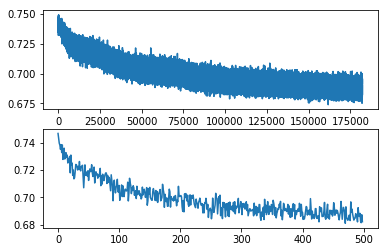

Training Accuracy:  0.6724727 Test Accuracy:  0.679


In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_array = []
    tcost_array = []
#   Training Cycle
    for epoch in range(1, epochs):
        avg_cost = 0.0
        total_batch = int(mnist.train.num_examples/batch)
#       Looping over batches
        for i in range(1, total_batch):
#           Getting data for batch
            batch_xs, batch_ys = mnist.train.next_batch(batch)

#           Calculating loss
            loss = sess.run(cost, feed_dict={X:batch_xs, Y:batch_ys})
            cost_array.append(loss)
#           Optimizing the model
            sess.run(optimizer, feed_dict={X:batch_xs, Y:batch_ys})

            avg_cost += loss
        avg_cost = avg_cost/float(total_batch)
        
#       Getting current weights and bias
        weights, bias = sess.run([W, b])
#       Test Data
        test_xs, test_ys = mnist.test.next_batch(batch)
#       Calculating test loss
        tcost = sess.run(cost, feed_dict={X:test_xs[:1000,:], Y:test_ys[:1000,:]})
        tcost_array.append(tcost)    
        
       
        if(epoch%step==0):
            print("Epoch: ", epoch, "Training Cost: ", avg_cost, "Test Cost: ", tcost)
            
    #     Plotting the error curve
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.plot(cost_array)
    ax2.plot(tcost_array)
    plt.show()

#   Accuracy
    cr, tr_acc = sess.run([correct, accuracy], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    ce, te_acc = sess.run([correct, accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})
    print ("Training Accuracy: ", tr_acc, "Test Accuracy: ", te_acc)
 

    